In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

from scipy import stats

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split 

from sklearn.linear_model import LogisticRegression

from prettytable import PrettyTable

In [84]:
sugar = pd.read_csv('diabetes.csv')
sugar

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
...,...,...,...,...,...,...,...,...,...,...
14995,1490300,10,65,60,46,177,33.512468,0.148327,41,1
14996,1744410,2,73,66,27,168,30.132636,0.862252,38,1
14997,1742742,0,93,89,43,57,18.690683,0.427049,24,0
14998,1099353,0,132,98,18,161,19.791645,0.302257,23,0


In [85]:
features = ['Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
target = ['Diabetic']

X, y = sugar[features], sugar[target]

In [86]:
y.isnull().sum()


Diabetic    0
dtype: int64

In [87]:
y.value_counts()

Diabetic
0           10000
1            5000
dtype: int64

In [88]:
sugar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


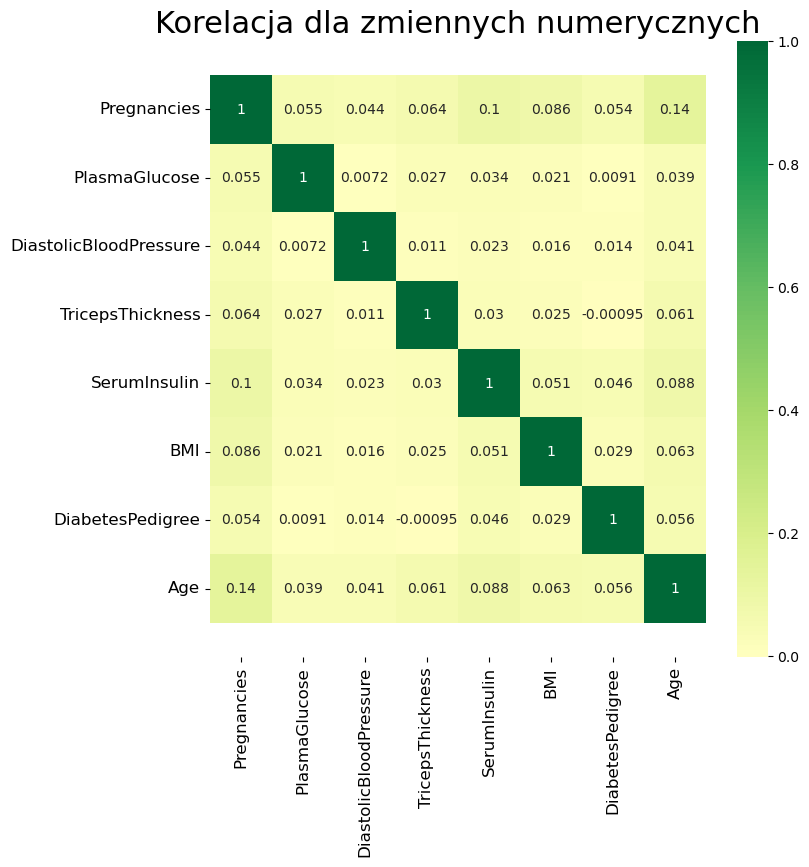

In [89]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(X.corr(),
                 xticklabels=X.corr().columns,
                 yticklabels=X.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True)

plt.title('Korelacja dla zmiennych numerycznych', fontsize=22)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [90]:
corr_dict = {}
for col in features:
    corr_dict[col] = stats.pointbiserialr(X[col], y)[0]
pd.Series(corr_dict).sort_values(ascending=False)

Pregnancies               [0.40731522139094956]
Age                         [0.342604994940714]
SerumInsulin               [0.2473754116925122]
BMI                       [0.21050789786645127]
DiabetesPedigree          [0.17030171101743152]
TricepsThickness          [0.15250528631583535]
PlasmaGlucose             [0.12800376980587153]
DiastolicBloodPressure     [0.0913066930454642]
dtype: object

widać najsilniejaszą korelacja pomiedzy chorobą a zmiennymi Pregnancies, Age, SerumInsulin i BMI          

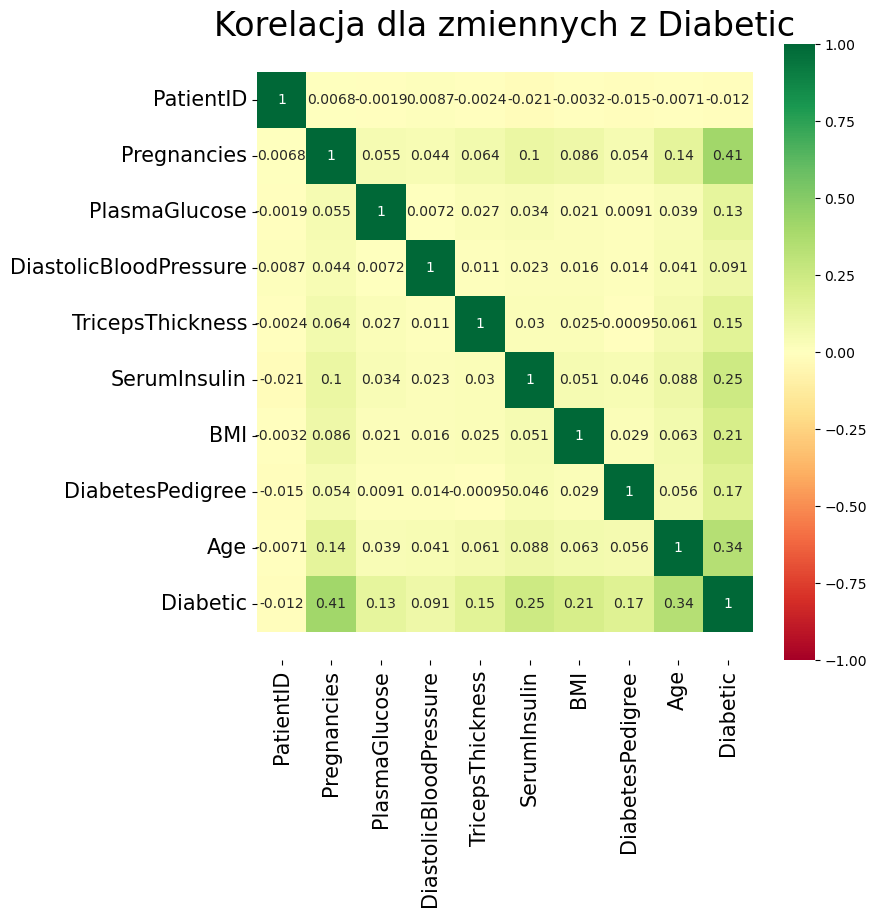

In [91]:
plt.figure(figsize=(8, 8))
ax = sns.heatmap(sugar.corr(),
                 xticklabels=sugar.corr().columns,
                 yticklabels=sugar.corr().columns,
                 cmap='RdYlGn',
                 center=0,
                 annot=True,
                 vmin=-1,
                 vmax= 1)

plt.title('Korelacja dla zmiennych z Diabetic', fontsize=24)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

Usuniecie zmiennych nieznaczacych

In [92]:
data_1 = sugar.drop('DiabetesPedigree', axis=1, inplace=True)
data_1 = sugar.drop('TricepsThickness', axis=1, inplace=True)
data_1 = sugar.drop('DiastolicBloodPressure', axis=1, inplace=True)
data_1 = sugar.drop('PlasmaGlucose', axis=1, inplace=True)
data_1 = sugar.drop('PatientID', axis=1, inplace=True)

In [93]:
X = sugar.drop('Diabetic', axis=1).copy()
y = sugar['Diabetic'].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(random_state=42)
X_train_pca = pca.fit_transform(X_train_scaler)
train_diabetes = pd.DataFrame(np.concatenate([X_train_pca,
                          np.array(y_train).reshape(-1, 1)],
                          axis=1))
train_diabetes.rename(columns = {0: 'PC1', 1: 'PC2',
                             2: 'PC3', 3: 'PC4', 4: 'Diabetic'},
                  inplace=True)
train_diabetes[['PC1', 'PC2','PC3','PC4']] = train_diabetes[['PC1', 'PC2','PC3', 'PC4']].astype(float)
train_diabetes.corr()

,PC1,PC2,PC3,PC4,Diabetic
PC1,1.000000e+00,-9.824066e-17,7.552171e-17,-1.135053e-16,0.544030
PC2,-9.824066e-17,1.000000e+00,5.658564e-17,-1.289868e-16,0.046473
PC3,7.552171e-17,5.658564e-17,1.000000e+00,7.637201e-17,-0.051270
PC4,-1.135053e-16,-1.289868e-16,7.637201e-17,1.000000e+00,-0.064256
Diabetic,5.440296e-01,4.647285e-02,-5.127005e-02,-6.425556e-02,1.000000


Grupowanie cech podobnych do siebie

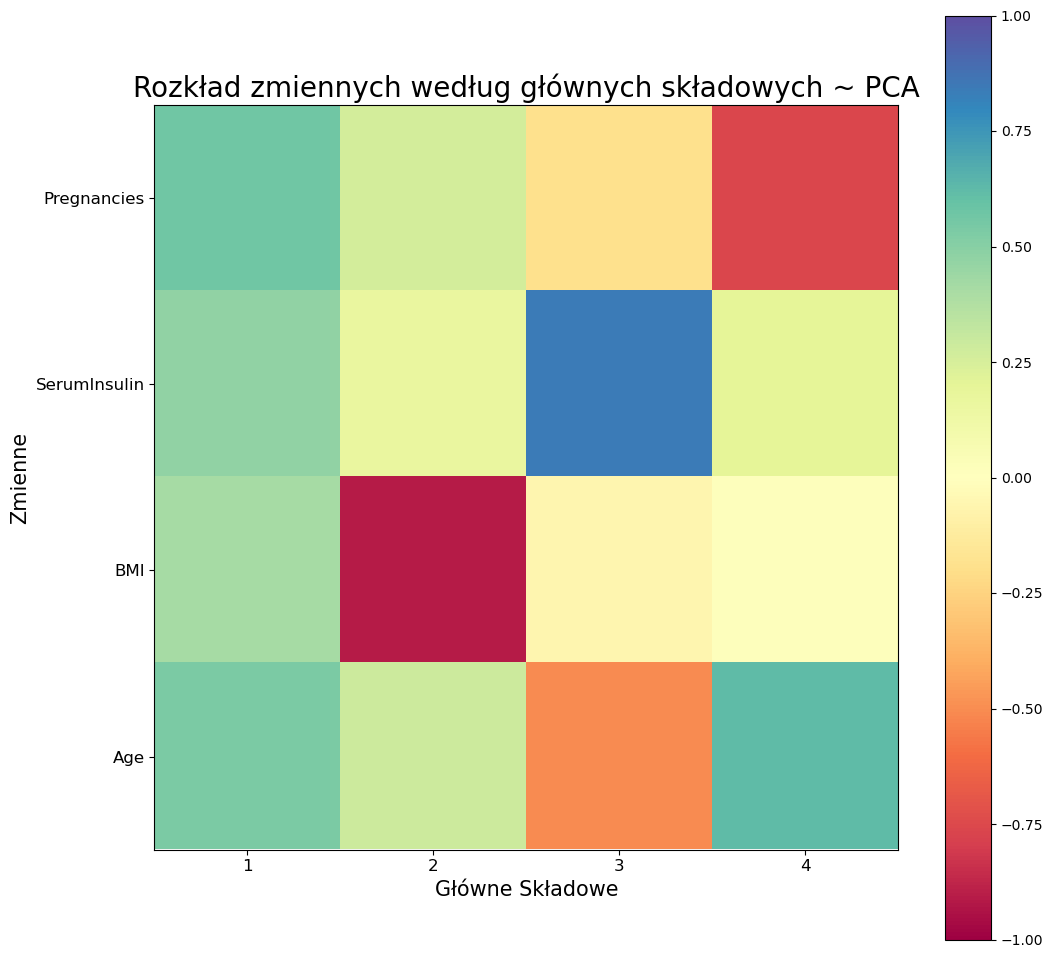

In [94]:
fig, ax = plt.subplots(figsize=(12, 12))
plt.imshow(pca.components_.T, cmap = 'Spectral', vmin =-1, vmax = 1)
plt.yticks(range(len(X_train.columns)), X_train.columns, fontsize=12)
plt.xticks(range(4), range(1, 5), fontsize=12)
plt.xlabel('Główne Składowe', fontsize=15)
plt.ylabel('Zmienne', fontsize=15)
plt.title('Rozkład zmiennych według głównych składowych ~ PCA', fontsize=20)
plt.colorbar()
plt.show()

Redukcja wymiaru bez znacznej utraty informacji

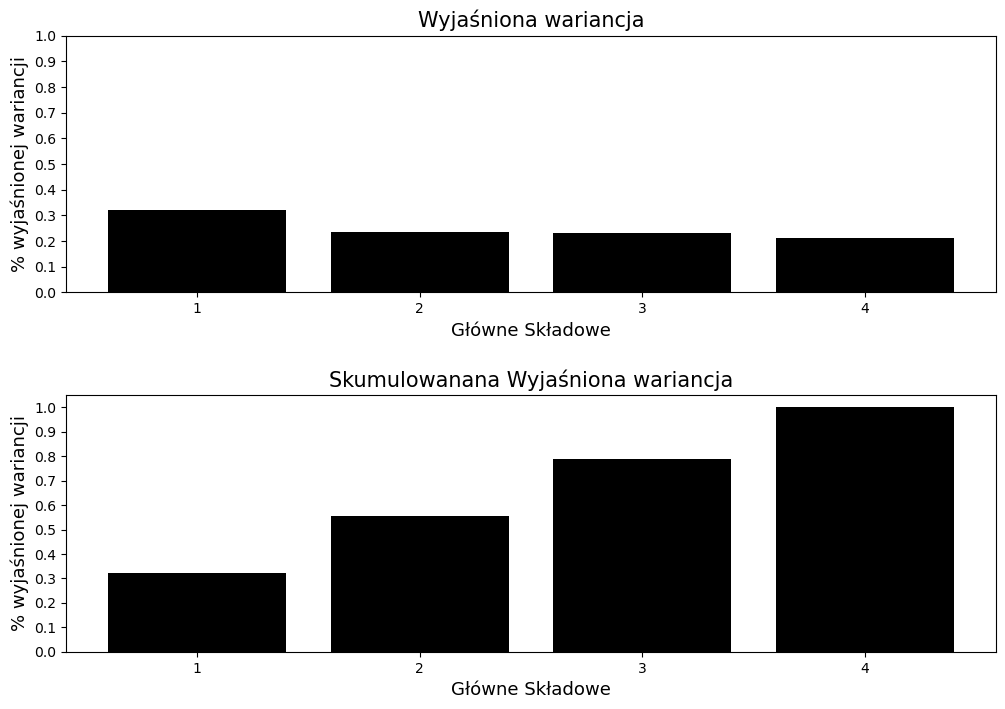

Główna składowa: 1, Wyjaśniona wariancja: 0.3211, Skumulowana Wyjaśniona wariancja: 0.3211
Główna składowa: 2, Wyjaśniona wariancja: 0.23557, Skumulowana Wyjaśniona wariancja: 0.55667
Główna składowa: 3, Wyjaśniona wariancja: 0.22977, Skumulowana Wyjaśniona wariancja: 0.78644
Główna składowa: 4, Wyjaśniona wariancja: 0.21356, Skumulowana Wyjaśniona wariancja: 1.0


In [95]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(wspace=.4, hspace=.4)
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(1, 1+pca.n_components_), pca.explained_variance_ratio_, color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
ax = fig.add_subplot(2, 1, 2)
ax.bar(range(1, 1+pca.n_components_), np.cumsum(pca.explained_variance_ratio_), color='black')
ax.set(xticks=[1, 2, 3, 4])
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title('Skumulowanana Wyjaśniona wariancja', fontsize=15)
plt.xlabel('Główne Składowe', fontsize=13)
plt.ylabel('% wyjaśnionej wariancji', fontsize=13)
plt.show()

principal_component = 1
cum_explained_var = 0
for explained_var in pca.explained_variance_ratio_:
    cum_explained_var += explained_var
    print(f'Główna składowa: {principal_component}, Wyjaśniona wariancja: {np.round(explained_var, 5)}, Skumulowana Wyjaśniona wariancja: {np.round(cum_explained_var, 5)}')
    principal_component += 1

Wizualizacja wielowymiarowych danych z wykorzystaniem redukcji zmiennych

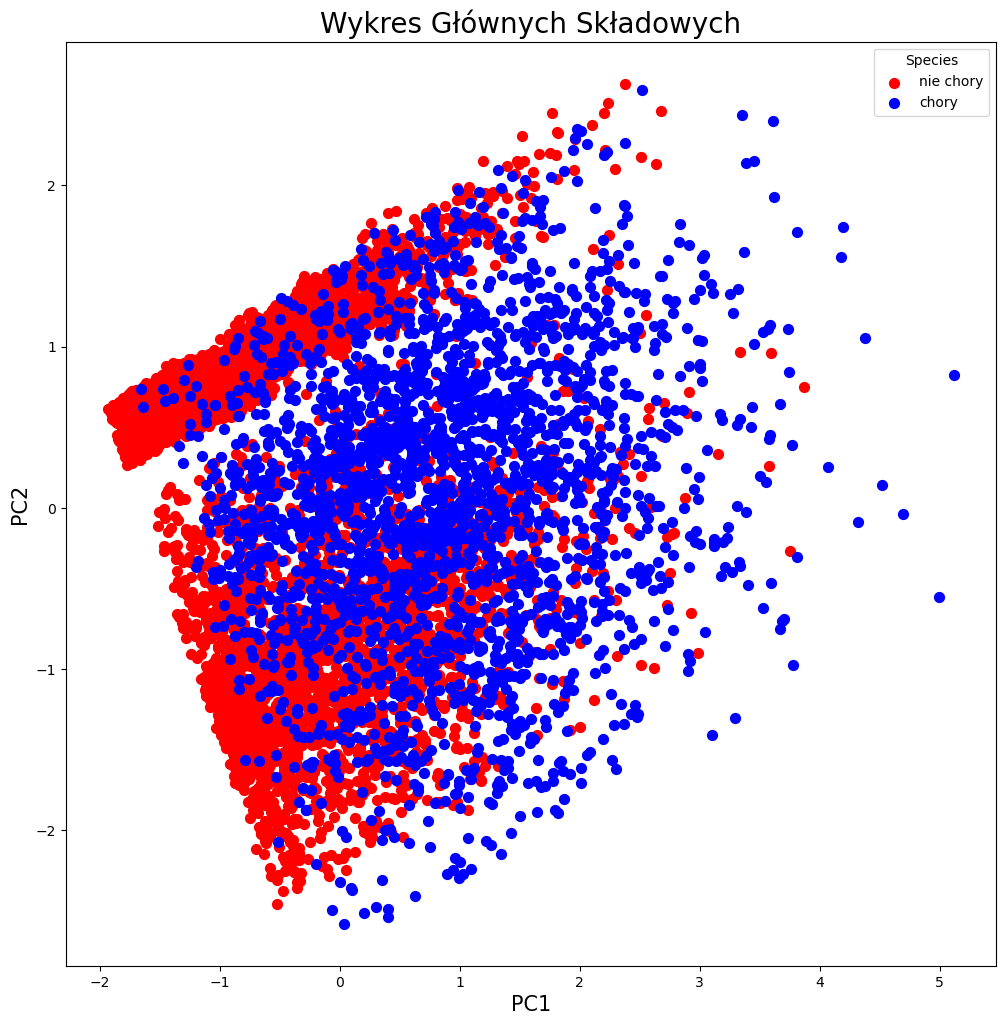

In [96]:
fig = plt.figure(figsize=(12, 12))
plt.scatter(x=train_diabetes.loc[train_diabetes['Diabetic']==0, 'PC1'],
            y=train_diabetes.loc[train_diabetes['Diabetic']==0,'PC2'],
            c='red', label='nie chory', s=50)
plt.scatter(x=train_diabetes.loc[train_diabetes['Diabetic']==1, 'PC1'],
            y=train_diabetes.loc[train_diabetes['Diabetic']==1,'PC2'],
            c='blue', label='chory', s=50)
plt.xlabel(xlabel='PC1', size=15)
plt.ylabel(ylabel='PC2', size=15)
plt.title('Wykres Głównych Składowych', size=20)
plt.legend(title='Species')
plt.show()

Redukcja wymiarowości jako inżyniera cech przed Uczeniem Nadzorowanym

In [97]:
X_test_scaler = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

def train_and_check(Xtrain, Xtest, ytrain, ytest):
    classifier = LogisticRegression(max_iter=100000)
    start = datetime.datetime.now()
    classifier.fit(Xtrain, ytrain)
    end = datetime.datetime.now()
    time = (end - start).microseconds
    evaluation = np.round(classifier.score(Xtest, ytest), 4)
    return evaluation, time

results = PrettyTable(['Model',
                       'Dokładność',
                       'Czas trenowania (microseconds)'])

# Trenowanie modelu na nieprzetworzonym zbiorze
not_scaled_data = train_and_check(X_train, X_test, y_train, y_test)
results.add_row(['Nieskalowane dane', not_scaled_data[0], not_scaled_data[1]])

# Trenowanie modelu na przetworzonym zbiorze
scaled_data = train_and_check(X_train_scaler, X_test_scaler, y_train, y_test)
results.add_row(['Skalowane dane', scaled_data[0], scaled_data[1]])

# Trenowanie modelu na czterech Głównych Składowych
PC4_data = train_and_check(X_train_pca, X_test_pca, y_train, y_test)
results.add_row(['4 PC', PC4_data[0], PC4_data[1]])

# Trenowanie modelu na trzech Głównych Składowych
PC3_data = train_and_check(X_train_pca[:, :3], X_test_pca[:, :3], y_train, y_test)
results.add_row(['3 PC', PC3_data[0], PC3_data[1]])

# Trenowanie modelu na dwóch Głównych Składowych
PC2_data = train_and_check(X_train_pca[:, :2], X_test_pca[:, :2], y_train, y_test)
results.add_row(['2 PC', PC2_data[0], PC2_data[1]])

# Trenowanie modelu na jednej Głównej Składowej
PC1_data = train_and_check(X_train_pca[:, :1], X_test_pca[:, :1],  y_train, y_test)
results.add_row(['1 PC', PC1_data[0], PC1_data[1]])
print(results)

+-------------------+------------+--------------------------------+
|       Model       | Dokładność | Czas trenowania (microseconds) |
+-------------------+------------+--------------------------------+
| Nieskalowane dane |   0.7603   |             79074              |
|   Skalowane dane  |   0.7603   |              9119              |
|        4 PC       |   0.7603   |             12219              |
|        3 PC       |   0.7671   |             13109              |
|        2 PC       |   0.7667   |             13252              |
|        1 PC       |   0.7665   |             13115              |
+-------------------+------------+--------------------------------+
